In [ ]:
import pandas as pd

# Baca metadata
metadata_path = '/content/sample_data/capstone/metadata.csv'
metadata = pd.read_csv(metadata_path, sep='|', header=None, names=['ID', 'Text', 'Normalized Text', 'Source'])

# Tampilkan beberapa informasi tentang dataset
print(metadata.head())

FileNotFoundError: ignored

In [ ]:
import librosa
import os

def load_audio_list(file_paths):
    audio_list = []
    sr_list = []

    for file_path in file_paths:
        # Muat file audio
        audio, sr = librosa.load(file_path, sr=None)
        audio_list.append(audio)
        sr_list.append(sr)

    return audio_list, sr_list

# Contoh penggunaan
folder_path =  '/content/sample_data/capstone/audio'
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
file_paths = [os.path.join(folder_path, file) for file in wav_files]

audio_list, sr_list = load_audio_list(file_paths)


**Praproses Data (Opsional)**

In [ ]:
# Contoh praproses menggunakan MFCC
def extract_mfcc(audio, sr, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

# Contoh penggunaan praproses MFCC pada setiap file audio
for i, (audio, sr) in enumerate(zip(audio_list, sr_list)):
    mfcc_features = extract_mfcc(audio, sr)
    print(f"MFCC features for audio file {i + 1}: {mfcc_features.shape}")

MFCC features for audio file 1: (13, 366)
MFCC features for audio file 2: (13, 301)
MFCC features for audio file 3: (13, 339)
MFCC features for audio file 4: (13, 216)
MFCC features for audio file 5: (13, 237)
MFCC features for audio file 6: (13, 191)
MFCC features for audio file 7: (13, 245)
MFCC features for audio file 8: (13, 292)
MFCC features for audio file 9: (13, 225)
MFCC features for audio file 10: (13, 162)
MFCC features for audio file 11: (13, 305)
MFCC features for audio file 12: (13, 305)
MFCC features for audio file 13: (13, 336)
MFCC features for audio file 14: (13, 112)
MFCC features for audio file 15: (13, 377)
MFCC features for audio file 16: (13, 301)
MFCC features for audio file 17: (13, 187)
MFCC features for audio file 18: (13, 168)
MFCC features for audio file 19: (13, 254)
MFCC features for audio file 20: (13, 201)
MFCC features for audio file 21: (13, 184)
MFCC features for audio file 22: (13, 256)
MFCC features for audio file 23: (13, 288)
MFCC features for au

**NORMALISASI DATA**

In [ ]:
import numpy as np

def normalize_mfcc(mfcc_features):
    # Normalisasi fitur-fitur MFCC menggunakan z-score
    mean = np.mean(mfcc_features, axis=1, keepdims=True)
    std = np.std(mfcc_features, axis=1, keepdims=True)
    normalized_mfcc = (mfcc_features - mean) / (std + 1e-8)  # Menghindari pembagian dengan nol

    return normalized_mfcc

# List untuk menyimpan dimensi fitur MFCC dari setiap file audio
mfcc_dimensions = []

# Contoh penggunaan normalisasi pada setiap file audio
for i, (audio, sr) in enumerate(zip(audio_list, sr_list)):
    mfcc_features = extract_mfcc(audio, sr)
    normalized_mfcc = normalize_mfcc(mfcc_features)

    # Menyimpan dimensi fitur MFCC
    number_of_mfcc_coefficients, number_of_frames = normalized_mfcc.shape
    mfcc_dimensions.append((number_of_mfcc_coefficients, number_of_frames))

    print(f"Normalized MFCC features for audio file {i + 1}: {normalized_mfcc.shape}")

# Menampilkan dimensi fitur MFCC untuk setiap file audio
for i, (num_coefficients, num_frames) in enumerate(mfcc_dimensions):
    print(f"Dimensions of MFCC features for audio file {i + 1}: {num_coefficients} coefficients x {num_frames} frames")


Normalized MFCC features for audio file 1: (13, 366)
Normalized MFCC features for audio file 2: (13, 301)
Normalized MFCC features for audio file 3: (13, 339)
Normalized MFCC features for audio file 4: (13, 216)
Normalized MFCC features for audio file 5: (13, 237)
Normalized MFCC features for audio file 6: (13, 191)
Normalized MFCC features for audio file 7: (13, 245)
Normalized MFCC features for audio file 8: (13, 292)
Normalized MFCC features for audio file 9: (13, 225)
Normalized MFCC features for audio file 10: (13, 162)
Normalized MFCC features for audio file 11: (13, 305)
Normalized MFCC features for audio file 12: (13, 305)
Normalized MFCC features for audio file 13: (13, 336)
Normalized MFCC features for audio file 14: (13, 112)
Normalized MFCC features for audio file 15: (13, 377)
Normalized MFCC features for audio file 16: (13, 301)
Normalized MFCC features for audio file 17: (13, 187)
Normalized MFCC features for audio file 18: (13, 168)
Normalized MFCC features for audio fi

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Fungsi untuk membuat spektrogram
def plot_spectrogram(audio, sr, title='Spectrogram'):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Fungsi untuk membuat plot fitur MFCC
def plot_mfcc(mfcc_features, title='MFCC'):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc_features, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Contoh penggunaan visualisasi
for i, (audio, sr) in enumerate(zip(audio_list, sr_list)):
    mfcc_features = extract_mfcc(audio, sr)
    normalized_mfcc = normalize_mfcc(mfcc_features)

    # Visualisasi spektrogram
    plot_spectrogram(audio, sr, title=f'Spectrogram - Audio {i + 1}')

    # Visualisasi MFCC
    plot_mfcc(normalized_mfcc, title=f'MFCC - Audio {i + 1}')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pip install soundfile

In [ ]:
import os
import librosa
import soundfile
import numpy as np
from scipy.signal import medfilt

# Fungsi untuk meredam noise dengan filter median
def median_filter(signal, kernel_size=3):
    return medfilt(signal, kernel_size)

# Fungsi untuk mengurangi noise dengan spektral subtraksi
def spectral_subtraction(signal, noise, alpha=1):
    signal_energy = np.sum(np.abs(signal)**2)
    noise_energy = np.sum(np.abs(noise)**2)
    reduction_factor = np.maximum(1.0 - alpha * (noise_energy / signal_energy), 0)
    denoised_signal = signal * reduction_factor
    return denoised_signal

# Fungsi untuk memproses semua file audio dalam suatu folder
def process_audio_folder(folder_path, output_folder):
    # Pastikan folder output ada atau buat jika belum ada
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterasi melalui semua file audio di dalam folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):
            input_path = os.path.join(folder_path, file_name)
            output_path = os.path.join(output_folder, file_name)

            # Memproses setiap file audio
            process_single_audio(input_path, output_path)

# Fungsi untuk memproses satu file audio
def process_single_audio(input_path, output_path):
    # Memuat file audio
    audio, sr = librosa.load(input_path, sr=None)

    # Menerapkan teknik pengurangan noise
    filtered_audio = median_filter(audio)
    noise_reference = audio[:int(sr*0.5)]  # Menggunakan 0.5 detik pertama sebagai referensi noise
    denoised_audio = spectral_subtraction(audio, noise_reference, alpha=0.002)

    # Menyimpan file audio hasil pengolahan
    soundfile.write(output_path, denoised_audio, sr)

# Contoh penggunaan
input_folder = '/content/sample_data/capstone/audio'
output_folder = '/content/sample_data/capstone/clear'

process_audio_folder(input_folder, output_folder)


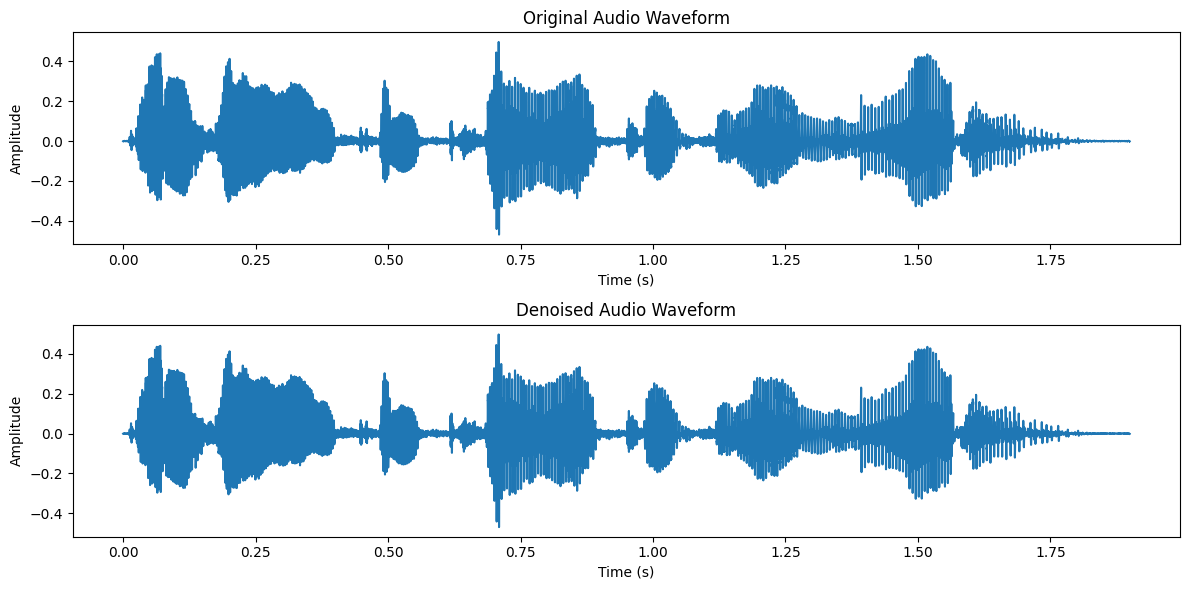

In [ ]:
import os
import librosa
import soundfile
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk meredam noise dengan filter median
def median_filter(signal, kernel_size=3):
    return medfilt(signal, kernel_size)

# Fungsi untuk mengurangi noise dengan spektral subtraksi
def spectral_subtraction(signal, noise, alpha=1):
    signal_energy = np.sum(np.abs(signal)**2)
    noise_energy = np.sum(np.abs(noise)**2)
    reduction_factor = np.maximum(1.0 - alpha * (noise_energy / signal_energy), 0)
    denoised_signal = signal * reduction_factor
    return denoised_signal

# Fungsi untuk memproses satu file audio
def process_single_audio(input_path, output_path):
    # Memuat file audio
    audio, sr = librosa.load(input_path, sr=None)

    # Menerapkan teknik pengurangan noise
    filtered_audio = median_filter(audio)
    noise_reference = audio[:int(sr*0.5)]  # Menggunakan 0.5 detik pertama sebagai referensi noise
    denoised_audio = spectral_subtraction(audio, noise_reference, alpha=0.002)

    # Menyimpan file audio hasil pengolahan
    soundfile.write(output_path, denoised_audio, sr)

    # Menampilkan plot dari gelombang suara asli dan hasil pengolahan
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.title('Original Audio Waveform')
    plt.plot(np.arange(len(audio)) / sr, audio)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.title('Denoised Audio Waveform')
    plt.plot(np.arange(len(denoised_audio)) / sr, denoised_audio)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Contoh penggunaan
input_folder = '/content/sample_data/capstone/audio'
output_folder = '/content/sample_data/capstone/clear'

# Pilih satu file audio
file_name = '/content/sample_data/capstone/clear/LJ001-0002.wav' #'/content/sample_data/capstone/audio_clear/LJ001-0001.wav'
input_path = os.path.join(input_folder, file_name)
output_path = os.path.join(output_folder, file_name)

# Proses audio
process_single_audio(input_path, output_path)


In [ ]:
import os

def auto_label_single_category(file_paths, category_label):
    labels = [category_label] * len(file_paths)
    return labels

# Contoh penggunaan
folder_path = '/content/sample_data/capstone/clear'
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
file_paths = [os.path.join(folder_path, file) for file in wav_files]

category_label = "manusia"
auto_labels = auto_label_single_category(file_paths, category_label)

# Menampilkan hasil label otomatis
for i, (file_path, auto_label) in enumerate(zip(file_paths, auto_labels)):
    print(f"Audio {i + 1} - File: {file_path}, Auto Label: {auto_label}")


Audio 1 - File: /content/sample_data/capstone/clear/LJ001-0057.wav, Auto Label: manusia
Audio 2 - File: /content/sample_data/capstone/clear/LJ001-0067.wav, Auto Label: manusia
Audio 3 - File: /content/sample_data/capstone/clear/LJ001-0024.wav, Auto Label: manusia
Audio 4 - File: /content/sample_data/capstone/clear/LJ001-0083.wav, Auto Label: manusia
Audio 5 - File: /content/sample_data/capstone/clear/LJ001-0056.wav, Auto Label: manusia
Audio 6 - File: /content/sample_data/capstone/clear/LJ001-0079.wav, Auto Label: manusia
Audio 7 - File: /content/sample_data/capstone/clear/LJ001-0006.wav, Auto Label: manusia
Audio 8 - File: /content/sample_data/capstone/clear/LJ001-0086.wav, Auto Label: manusia
Audio 9 - File: /content/sample_data/capstone/clear/LJ001-0062.wav, Auto Label: manusia
Audio 10 - File: /content/sample_data/capstone/clear/LJ001-0039.wav, Auto Label: manusia
Audio 11 - File: /content/sample_data/capstone/clear/LJ001-0065.wav, Auto Label: manusia
Audio 12 - File: /content/samp

In [ ]:
from sklearn.model_selection import train_test_split

# Pembagian dataset menjadi pelatihan (80%) dan pengujian (20%)
train_files, test_files, train_labels, test_labels = train_test_split(
    file_paths, auto_labels, test_size=0.2, random_state=42
)

# Output jumlah data pada setiap bagian
print(f"Jumlah data pelatihan: {len(train_files)}")
print(f"Jumlah data pengujian: {len(test_files)}")


Jumlah data pelatihan: 80
Jumlah data pengujian: 20


In [ ]:
import librosa
import numpy as np
import os

# Fungsi untuk menghitung fitur MFCC dari file audio
def compute_mfcc(audio_file, n_mfcc=13, target_length=419):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Menyesuaikan panjang MFCC
    if mfccs.shape[1] < target_length:
        # Menambahkan nilai nol untuk fitur-fitur yang lebih pendek
        padding = np.zeros((mfccs.shape[0], target_length - mfccs.shape[1]))
        mfccs = np.concatenate((mfccs, padding), axis=1)
    else:
        # Memotong fitur-fitur yang lebih panjang
        mfccs = mfccs[:, :target_length]

    return mfccs

# Fungsi untuk normalisasi fitur MFCC
def normalize_mfcc(mfcc_list):
    # Normalisasi menggunakan z-score
    mean = np.mean(mfcc_list, axis=0)
    std = np.std(mfcc_list, axis=0)
    normalized_mfcc_list = (mfcc_list - mean) / (std + 1e-8)
    return normalized_mfcc_list

# Direktori tempat Anda menyimpan file audio
audio_directory = '/content/sample_data/capstone/clear'

# Mendapatkan daftar file audio dalam direktori
audio_files = [os.path.join(audio_directory, file) for file in os.listdir(audio_directory) if file.endswith('.wav')]

# Menghitung fitur MFCC untuk setiap file audio
mfcc_list = [compute_mfcc(audio_file) for audio_file in audio_files]

# Normalisasi fitur MFCC
normalized_mfcc_list = normalize_mfcc(np.array(mfcc_list))

# Cetak bentuk dari setiap elemen di dalam normalized_mfcc_list
print(f"normalized_mfcc_list shape: {normalized_mfcc_list.shape}")


normalized_mfcc_list shape: (100, 13, 419)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

def equalize_mfcc_length(mfcc_list, target_length):
    equalized_mfcc_list = []
    for mfcc in mfcc_list:
        if mfcc.shape[1] < target_length:
            # Menambahkan nilai nol untuk fitur-fitur yang lebih pendek
            padding = np.zeros((mfcc.shape[0], target_length - mfcc.shape[1]))
            equalized_mfcc = np.concatenate((mfcc, padding), axis=1)
        else:
            # Memotong fitur-fitur yang lebih panjang
            equalized_mfcc = mfcc[:, :target_length]
        equalized_mfcc_list.append(equalized_mfcc)
    return equalized_mfcc_list


In [ ]:
# Panjang target untuk fitur MFCC
target_length = 419

# Mengonversi fitur-fitur MFCC dengan panjang yang disamakan menjadi array NumPy
X_train = np.array(equalize_mfcc_length(normalized_mfcc_train, target_length=target_length))
y_train = np.array(train_labels)
X_test = np.array(equalize_mfcc_length(normalized_mfcc_test, target_length=target_length))
y_test = np.array(test_labels)

# Cetak bentuk dari setiap elemen di dalam X_train, y_train, X_test, y_test
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80, 13, 419)
y_train shape: (80,)
X_test shape: (20, 13, 419)
y_test shape: (20,)


In [ ]:
import numpy as np

# Fungsi untuk membuat fitur-fitur MFCC memiliki panjang yang sama
def equalize_mfcc_length(mfcc_list, target_length):
    equalized_mfcc_list = []
    for mfcc in mfcc_list:
        if mfcc.shape[1] < target_length:
            # Menambahkan nilai nol untuk fitur-fitur yang lebih pendek
            padding = np.zeros((mfcc.shape[0], target_length - mfcc.shape[1]))
            equalized_mfcc = np.concatenate((mfcc, padding), axis=1)
        else:
            # Memotong fitur-fitur yang lebih panjang
            equalized_mfcc = mfcc[:, :target_length]
        equalized_mfcc_list.append(equalized_mfcc)
    return equalized_mfcc_list

# Mengonversi fitur-fitur MFCC dengan panjang yang disamakan menjadi array NumPy
X_train = np.array(equalize_mfcc_length(normalized_mfcc_train, target_length=419))
y_train = np.array(train_labels)
X_test = np.array(equalize_mfcc_length(normalized_mfcc_test, target_length=419))
y_test = np.array(test_labels)

# Cetak bentuk dari setiap elemen di dalam X_train, y_train, X_test, y_test
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80, 13, 419)
y_train shape: (80,)
X_test shape: (20, 13, 419)
y_test shape: (20,)


In [ ]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Contoh penggunaan LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train).astype(np.int32)
y_test_encoded = label_encoder.transform(y_test).astype(np.int32)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Mendefinisikan model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(13, 419, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((1, 2)))  # Mengurangi faktor downsampling pada dimensi kedua
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(23, activation='softmax'))


# Menampilkan ringkasan model
model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 11, 417, 32)       320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 208, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 206, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 1, 103, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 103, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 51, 128)       

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Contoh penggunaan LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Mengompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train.reshape((*X_train.shape, 1)), y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Mengevaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(X_test.reshape((*X_test.shape, 1)), y_test_encoded)
print(f'Test accuracy: {test_acc}')

# Menyimpan model
model.save('audio_classification_model.h5')


Epoch 1/10
2/2 [==============================] - 2s 431ms/step - loss: 2.5755 - accuracy: 0.5000 - val_loss: 0.5574 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 0s 234ms/step - loss: 0.4119 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 191ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 2.2352e-07 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 182ms/step - loss: 6.1129e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 189ms/step - loss: 1.4715e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 192ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 193ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Memuat model yang telah disimpan
loaded_model = load_model('audio_classification_model.h5')

# Membuat prediksi pada data pengujian
predictions = loaded_model.predict(X_test.reshape((*X_test.shape, 1)))

# Mengambil kelas dengan nilai probabilitas tertinggi sebagai prediksi
predicted_labels = np.argmax(predictions, axis=1)

# Menampilkan hasil prediksi
print("Predicted Labels:", predicted_labels)
print("True Labels:", y_test_encoded)

# Evaluasi performa model (misalnya, matriks kebingungan)
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test_encoded, predicted_labels)
class_report = classification_report(y_test_encoded, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


1/1 [==============================] - 0s 206ms/step
Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Confusion Matrix:
[[20]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



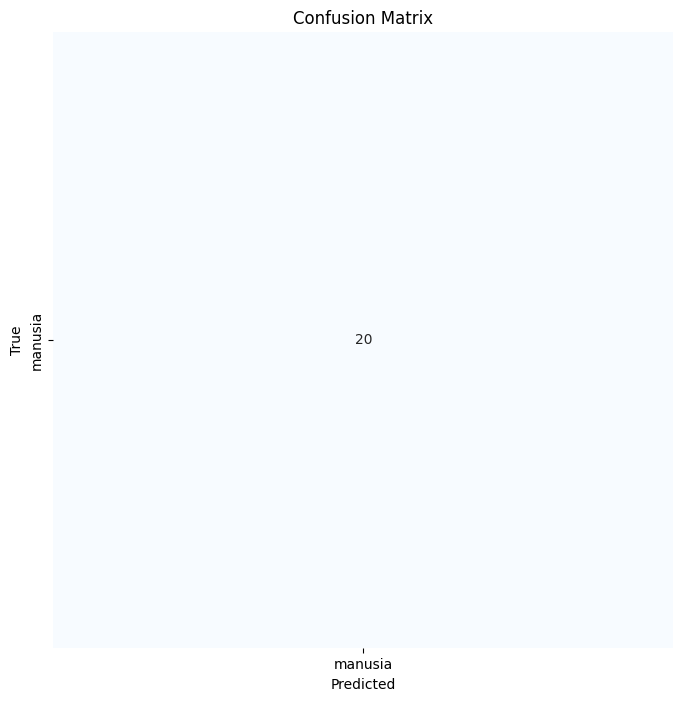

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


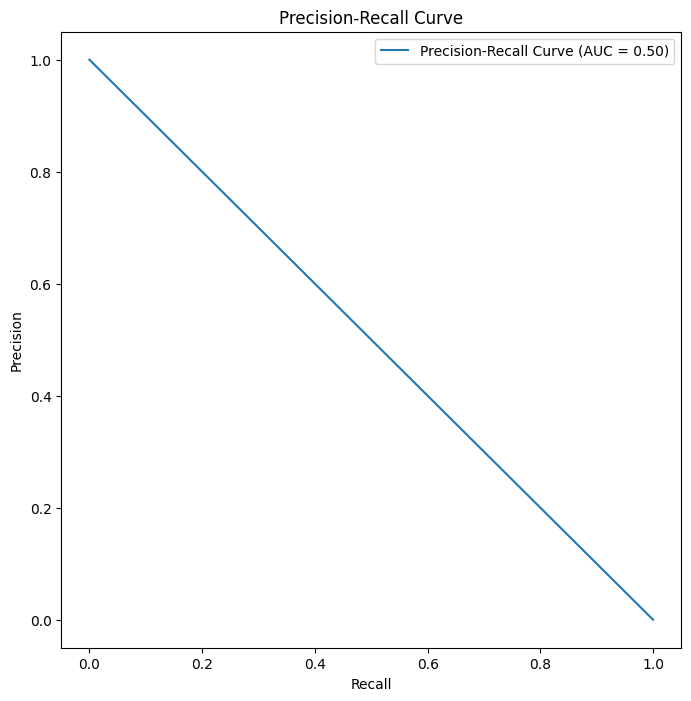

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menampilkan matriks kebingungan
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Menampilkan matriks kebingungan
plot_confusion_matrix(conf_matrix, class_names=label_encoder.classes_)

# Menampilkan kurva precision-recall untuk setiap kelas
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test_encoded, predictions[:, 1])
area_under_curve = auc(recall, precision)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Create a new model or load the previously saved model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(13, 419, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((1, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(23, activation='softmax'))

# Compile the model with a different learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the updated learning rate
history = model.fit(X_train.reshape((*X_train.shape, 1)), y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
2/2 [==============================] - 2s 426ms/step - loss: 3.0119 - accuracy: 0.6406 - val_loss: 2.8088 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 0s 192ms/step - loss: 2.7624 - accuracy: 1.0000 - val_loss: 2.5232 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 182ms/step - loss: 2.4958 - accuracy: 1.0000 - val_loss: 2.1939 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 184ms/step - loss: 2.1867 - accuracy: 1.0000 - val_loss: 1.8157 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 228ms/step - loss: 1.8279 - accuracy: 1.0000 - val_loss: 1.3996 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 183ms/step - loss: 1.4350 - accuracy: 1.0000 - val_loss: 0.9762 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 189ms/step - loss: 1.0343 - accuracy: 1.0000 - val_loss: 0.6039 - val_accuracy: 1.0000
Epoch 8/10
2/2 [====

In [ ]:
# Mengevaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(X_test.reshape((*X_test.shape, 1)), y_test_encoded)
print(f'Test accuracy: {test_acc}')


1/1 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0


##########

In [5]:
import librosa
import numpy as np

# Fungsi untuk ekstraksi fitur MFCC
def extract_mfcc(audio, sr, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

# Fungsi untuk normalisasi fitur-fitur MFCC
def normalize_mfcc(mfcc_features):
    mean = np.mean(mfcc_features, axis=1, keepdims=True)
    std = np.std(mfcc_features, axis=1, keepdims=True)
    normalized_mfcc = (mfcc_features - mean) / (std + 1e-8)
    return normalized_mfcc

# Mendefinisikan path file audio baru
new_audio_file = '/content/sample_data/audio/LJ001-0002.wav'

# Membaca file audio
new_audio, new_sr = librosa.load(new_audio_file, sr=None)

# Memastikan bahwa audio dalam bentuk numpy.ndarray
new_audio = np.asarray(new_audio)

# Ekstraksi fitur MFCC
new_mfcc = extract_mfcc(new_audio, sr=new_sr)

# Normalisasi fitur-fitur MFCC
normalized_new_mfcc = normalize_mfcc(new_mfcc)

# Cetak bentuk fitur-fitur MFCC yang diekstraksi
print(f"Shape of Extracted MFCC Features: {new_mfcc.shape}")
print(f"Shape of Normalized MFCC Features: {normalized_new_mfcc.shape}")


Shape of Extracted MFCC Features: (13, 82)
Shape of Normalized MFCC Features: (13, 82)


In [6]:
# Contoh: Membuat prediksi pada satu contoh audio baru
new_audio_file = '/content/sample_data/audio/LJ001-0002.wav'  # Ganti dengan path file audio baru Anda
new_mfcc = extract_mfcc(new_audio_file, sr=22050)  # Ganti dengan nilai sampling_rate yang sesuai
normalized_new_mfcc = normalize_mfcc(new_mfcc)

# Reshape data sesuai dengan bentuk input model
input_data = normalized_new_mfcc.reshape((1, n_mfcc, target_length))

# Membuat prediksi menggunakan model
prediction = model.predict(input_data)

# Mendapatkan kelas prediksi
predicted_class = np.argmax(prediction)

print(f'Predicted Class: {predicted_class}')


ParameterError: ignored

In [1]:
import librosa

# Mendapatkan laju sampel dari file audio
audio_file = '/content/sample_data/audio/LJ001-0002.wav'  # Ganti dengan path file audio Anda
sampling_rate = librosa.get_samplerate(audio_file)

print(f'Sampling Rate: {sampling_rate} Hz')


Sampling Rate: 22050 Hz


In [ ]:
# Membuat prediksi pada data baru
new_data_predictions = model.predict(new_data.reshape((1, 13, 419, 1)))

# Mengambil kelas dengan nilai probabilitas tertinggi sebagai prediksi
predicted_label_new_data = np.argmax(new_data_predictions, axis=1)
print(f'Predicted Label for New Data: {predicted_label_new_data}')


NameError: ignored

In [ ]:
# Praproses Data untuk Model
def preprocess_data(file_paths, labels):
    audio_list = []
    label_list = []

    for file_path, label in zip(file_paths, labels):
        # Muat file audio
        audio, sr = librosa.load(file_path, sr=None)

        # Ekstrak fitur MFCC dan normalisasi
        mfcc_features = extract_mfcc(audio, sr)
        normalized_mfcc = normalize_mfcc(mfcc_features)

        # Reshape fitur MFCC untuk sesuai dengan model CNN
        reshaped_mfcc = normalized_mfcc[..., np.newaxis]  # Menambahkan dimensi channel

        # Menambahkan ke daftar audio dan label
        audio_list.append(reshaped_mfcc)
        label_list.append(label)

    return np.array(audio_list), np.array(label_list)

In [ ]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split

# Path of audio files
file_paths = []

# Labels of audio files
labels = [0, 1, ...] # 0 for negative sentiment, 1 for positive sentiment

# Preprocess data
X, y = preprocess_data(file_paths, labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: ignored